# Crawling 591 website example

#  data munging

In [1]:
import requests


url = "https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=60&totalRows=571"
headers = {
   'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36' 
}
res = requests.get(url,headers=headers)
data = res.json()

In [2]:
# data

In [46]:
import pandas
df = pandas.DataFrame(data["data"]["data"])
df.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,四維路22巷仁愛圓環邊間二..,仁愛圓環邊間二房美寓,仁愛圓環邊間二房美寓,22巷,4,...,0,四維路,25619,1,元/月,1500028322,965423,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
1,"<img src=""./images/index/userCenter/list_vip_v...",0,0,0,,信義路三段134巷近大安站..,近大安站.大安森林公園AIT精美三房,近大安站.大安森林公園AIT精美三房,134巷,7,...,0,信義路三段,25647,1,元/月,1500111330,2013042,vipStyle,"<img src=""./images/index/userCenter/list_vip_v...",isvip
2,,0,0,0,,"金山南路二段寧靜美宅,人文薈..","寧靜美宅,人文薈萃,都市核心,錯過不在","寧靜美宅,人文薈萃,都市核心,錯過不在",,4,...,0,金山南路二段,25642,1,元/月,1500728431,1791779,,,
3,,0,0,0,,金山南路二段獨家！捷運東門旁..,獨家！捷運東門旁1分【電梯3房】可住可辦,獨家！捷運東門旁1分【電梯3房】可住可辦,,12,...,0,金山南路二段,25642,1,元/月,1500654974,1318377,,,
4,,0,0,0,,忠孝東路四段216巷捷運忠孝敦..,捷運忠孝敦化站4分【正東區】精品2房1廳,捷運忠孝敦化站4分【正東區】精品2房1廳,216巷,5,...,0,忠孝東路四段,25637,1,元/月,1500637023,1318377,,,


In [47]:
# get useful info we need
df = df[["address","floor","allfloor","layout","area","price","browsenum_all"]]
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,四維路22巷仁愛圓環邊間二..,4,4,2房2廳2衛,37.7,"48,000",179
1,信義路三段134巷近大安站..,2,7,3房2廳2衛,37.1,"33,000",822
2,"金山南路二段寧靜美宅,人文薈..",2,4,2房2廳1衛,26.0,"33,000",15
3,金山南路二段獨家！捷運東門旁..,8,12,3房2廳2衛,25.0,"39,800",55
4,忠孝東路四段216巷捷運忠孝敦..,4,5,2房1廳1衛,20.0,"33,000",410


# Data Cleaning

In [48]:
# get info of bedroom, livingroom, bathroom
# df["layout"]
# extract groups from the first match of regular expression
df[["layout_bedroom","layout_livingroom","layout_bathroom"]] = df["layout"].str.extract("(\d+)房(\d+)廳(\d+)衛",expand=False)
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,四維路22巷仁愛圓環邊間二..,4,4,2房2廳2衛,37.7,"48,000",179,2,2,2
1,信義路三段134巷近大安站..,2,7,3房2廳2衛,37.1,"33,000",822,3,2,2
2,"金山南路二段寧靜美宅,人文薈..",2,4,2房2廳1衛,26.0,"33,000",15,2,2,1
3,金山南路二段獨家！捷運東門旁..,8,12,3房2廳2衛,25.0,"39,800",55,3,2,2
4,忠孝東路四段216巷捷運忠孝敦..,4,5,2房1廳1衛,20.0,"33,000",410,2,1,1


In [49]:
# convert price
df["price"] = df["price"].map(lambda e: int(''.join(e.split(','))))
# df["price"]
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,四維路22巷仁愛圓環邊間二..,4,4,2房2廳2衛,37.7,48000,179,2,2,2
1,信義路三段134巷近大安站..,2,7,3房2廳2衛,37.1,33000,822,3,2,2
2,"金山南路二段寧靜美宅,人文薈..",2,4,2房2廳1衛,26.0,33000,15,2,2,1
3,金山南路二段獨家！捷運東門旁..,8,12,3房2廳2衛,25.0,39800,55,3,2,2
4,忠孝東路四段216巷捷運忠孝敦..,4,5,2房1廳1衛,20.0,33000,410,2,1,1


In [51]:
df.to_excel("house591.xlsx")

# Data Stroage

In [52]:
import sqlite3
# store data into sqlite
conn = sqlite3.connect("house.sqlite")
# with sqlite3.connect('house.sqlite') as db:
#     df.to_sql('renthouse', con = db)
df.to_sql("renthouse",con=conn)

In [53]:
# retrieve data from sqlite
with sqlite3.connect("house.sqlite") as db:
    df2 = pandas.read_sql_query("select * from renthouse",con=db) #Read SQL query into a DataFrame
df2.head()

,index,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,0,四維路22巷仁愛圓環邊間二..,4,4,2房2廳2衛,37.7,48000,179,2,2,2
1,1,信義路三段134巷近大安站..,2,7,3房2廳2衛,37.1,33000,822,3,2,2
2,2,"金山南路二段寧靜美宅,人文薈..",2,4,2房2廳1衛,26.0,33000,15,2,2,1
3,3,金山南路二段獨家！捷運東門旁..,8,12,3房2廳2衛,25.0,39800,55,3,2,2
4,4,忠孝東路四段216巷捷運忠孝敦..,4,5,2房1廳1衛,20.0,33000,410,2,1,1


# Data Analysis

In [54]:
df.describe()

,floor,allfloor,area,price,browsenum_all
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5.300000,10.000000,36.790000,54796.666667,423.733333
std,3.120013,3.805622,17.678827,33003.411353,670.224509
min,1.000000,4.000000,12.000000,21500.000000,8.000000
25%,3.250000,7.000000,25.475000,33000.000000,68.250000
50%,4.500000,10.500000,32.500000,45500.000000,215.000000
75%,7.750000,14.000000,52.250000,66000.000000,405.250000
max,13.000000,16.000000,71.000000,178000.000000,3190.000000


In [55]:
df.sort_values(["price"],ascending=False).head() # descending order

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
17,大安路二段捷運大安站/靜巷豪..,4,7,3房2廳2衛,70.2,178000,18,3,2,2
19,"敦化南路一段尊貴輝煌,鑽石名..",10,14,3房2廳2衛,62.4,120000,20,3,2,2
24,仁愛路四段MRT國父紀念館仁愛..,4,14,2房2廳2衛,56.2,90000,8,2,2,2
9,仁愛路四段精美屋況●採光明亮..,4,14,2房2廳2衛,56.0,90000,205,2,2,2
10,復興南路一段低公設美四房●精..,4,7,4房2廳3衛,62.0,83000,108,4,2,3


In [64]:
import requests
# give firstRow empty and loop it later
# {} format to impulse number
url = "https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=571"
headers = {
   'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36' 
}

house_arr = []
for i in range(0,21):
    res = requests.get(url.format(i*20),headers=headers)
    data = res.json()
    df = pandas.DataFrame(data["data"]["data"])
    df = df[['address', 'floor', 'allfloor', 'layout','area', 'price','browsenum_all']]
#     print(df)
    df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛', expand=False)
    df['price'] = df['price'].map(lambda x: int(''.join(x.split(','))))
    house_arr.append(df)

In [65]:
df = pandas.concat(house_arr) #軸向連接，沿著特定的軸(相同label)連接資料
df.to_excel("house591(1).xlsx")

In [66]:
df = pandas.read_excel("house591(1).xlsx")

Populating the interactive namespace from numpy and matplotlib


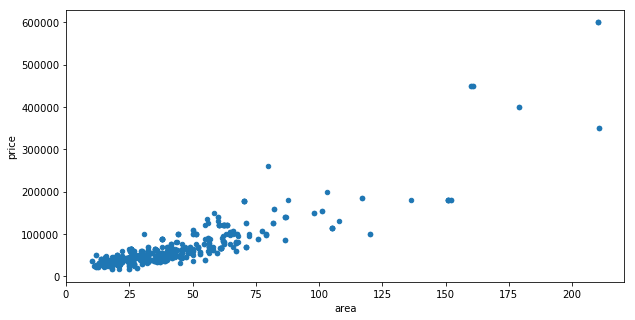

In [71]:
# draw scatter
%pylab inline
df[["price","area"]].plot(kind="scatter", x="area", y="price",figsize=[10,5])
# figsize - 圖片大小 10 inch * 5 inch

In [77]:
# build a linear regression
from sklearn.linear_model import LinearRegression
y = df["price"]
x = df[["area"]]
# print(x) # have header
# print(y) # no header
regression = LinearRegression()
regression.fit(x,y)

print("Coefficient:{}".format(regression.coef_))
print("Intercept:{}".format(regression.intercept_))

Coefficient:[ 1832.4971191]
Intercept:-12244.700443207723


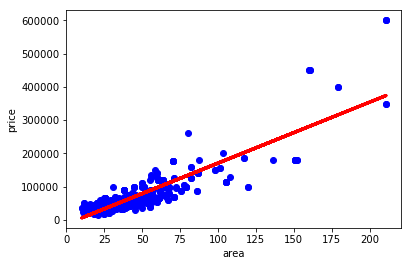

In [79]:
# draw a regression line

plt.scatter(x,y, color="blue")
plt.plot(x, regression.predict(x), linewidth = 3, color = "red")
plt.xlabel('area')
plt.ylabel('price')